<a href="https://colab.research.google.com/github/gilesitorr/DataScience3_Bloque4/blob/main/DS3_proyecto_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BEDU: Data Science 3 (Santander Universidades)**
# *Análisis de Datos con Python 2021*

## El Terrorismo Global

__Disclaimer:__ El estudio de esta base de datos y todos los resultados obtenidos tienen como fin único el uso didáctico de la información. Este trabajo no pretende reflejar alguna postura política ni pretende faltar al respeto a grupo alguno de personas. Se recomienda discreción en su lectura.

__Nota:__ Los derechos de los datos utilizados pertenecen a _START_. La cita completa se muestra a continuación:

_National Consortium for the Study of Terrorism and Responses to Terrorism (START), University of Maryland. (2018). The Global Terrorism Database (GTD). Retrieved from https://www.start.umd.edu/gtd_

Para ver la base de datos original, se puede revisar el siguiente [enlace de Kaggle](https://www.kaggle.com/START-UMD/gtd).

__Equipo 2__

El equipo de colaboradores en este trabajo está compuesto por:
- __Gómez Barraza__, Karla Daniela
- __Guevara Moreno__, Fernando
- __Muñoz Esparza__, José Cruz
- __Rodríguez Rivera__, Gil Estéfano
- __Rosado Martínez__, Ana Elizabeth

_([Aquí puede consultar el repositorio de GitHub](https://github.com/gilesitorr/DataScience3_Bloque4))_.

La base de datos original fue previamente procesada en el siguiente [Notebook de Google Colab](https://colab.research.google.com/drive/1e81330SWOLdPSP8Frn6LJx7OmAWWlEjF?usp=sharing).

In [ ]:
# Se importan las librerías para el análisis y operacion con datos
import numpy as np
import pandas as pd

# Para graficar y hacer visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import folium
!pip install --upgrade plotly
import plotly.express as px

# Para la media truncada
from scipy import stats

# Para la regresión lineal
from sklearn.linear_model import LinearRegression

     |████████████████████████████████| 23.9 MB 12 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# Se define el estilo de las gráficas
sns.set(style="ticks")

In [ ]:
# Se lee el dataset a utilizar (que ya fue previamente procesado)
url = "https://github.com/gilesitorr/DataScience3_Bloque4/blob/main/gdt_clean_dataset.csv?raw=true"
df = pd.read_csv(url)

## Postwork 01: Obteniendo estimados de locación y variabilidad

1. Identifica las columnas de tu dataset que tengan datos numéricos.

2. Identifica la relevancia de esas columnas (qué tan importantes son para responder a tus preguntas).

3. Obtén los siguientes estimados de tus columnas numéricas:
  - Promedio
  - Mediana
  - Media Truncada
  - Desviación estándar
  - Rango
  - Percentiles 25 y 75
  - Rango intercuartil

### 1. Identifica las columnas de tu dataset que tengan datos numéricos.

In [ ]:
df.dtypes

eventid              int64
iyear                int64
imonth               int64
iday                 int64
country_txt         object
region_txt          object
latitude           float64
longitude          float64
success              int64
suicide              int64
attacktype1          int64
attacktype1_txt     object
targtype1            int64
targtype1_txt       object
weaptype1            int64
weaptype1_txt       object
nkill              float64
nwound             float64
dtype: object

Note que, aunque hay columnas con valores numéricos, casi todas representan variables categóricas. Sin embargo, sí puede hacerse un análisis sobre las columnas _iyear_, _imonth_ y _iday_, para determinar los años (entre 1970 y 2017, exceptuando 1993, de acuerdo a la documentación del dataset) donde ha habido más atentados así como para visualizar la distribución de los meses y los días, respectivamente, respecto a la cantidad de atentados. Otras columnas numéricas también son las de _longitude_ y _latitude, que representan la ubicación geográfica del atentado. También las  columnas _nkill_ y _nwound_ pueden estudiarse (son las columnas del número de personas heridas y muertas en el atentado).

In [ ]:
# Se obtienen las columnas discutidas para realizar este postwork
df_pw_1 = df[["iyear", "imonth", "iday", "latitude", "longitude", "nkill", "nwound"]]
df_pw_1.head()

,iyear,imonth,iday,latitude,longitude,nkill,nwound
0,1970,7,2,18.456792,-69.951164,1.0,0.0
1,1970,1,1,37.005105,-89.176269,0.0,0.0
2,1970,1,2,-34.891151,-56.187214,0.0,0.0
3,1970,1,2,37.791927,-122.225906,0.0,0.0
4,1970,1,2,43.076592,-89.412488,0.0,0.0


### 2. Identifica la relevancia de esas columnas (qué tan importantes son para responder a tus preguntas).

A continuación se indican las preguntas que guiarán el presente proyecto, así como se discute la relevancia que tienen las columnas seleccionadas previamente para la resolución de las mismas.


1.   ¿Hay una relación entre el periodo de tiempo y la cantidad de atentados que se observan?
2.   ¿Existe una tendencia en la cantidad de atentados en ubicaciones geográficas determinadas?

En cuanto a la primera pregunta, podemos hacer uso de la columna *iyear* para indicar un periodo de tiempo más general, en tanto que las columnas *imonth* y *iday* nos indicarían secciones de tiempo más específicas. Por otra parte, la segunda pregunta puede ser contestada por medio de la observación de las columnas *latitude* y *longitude*, ya sea prestando atención al comportamiento de valores de nuestro interés en esta etapa inicial o bien, seleccionando aquellos que llamen nuestra atención de acuerdo a lo visto en el desarrollo de este proyecto.



### 3. Obtén los estimados.

In [ ]:
# El promedio de las columnas
mean = df_pw_1.mean()
mean

iyear        2002.706499
imonth          6.467478
iday           15.582058
latitude       23.503621
longitude    -460.809929
nkill           2.406442
nwound          3.176587
dtype: float64

In [ ]:
# La mediana de las columnas
median = df_pw_1.median()
median

iyear        2009.000000
imonth          6.000000
iday           15.000000
latitude       31.467463
longitude      43.294178
nkill           0.000000
nwound          0.000000
dtype: float64

In [ ]:
# La media truncada (del 10% de los datos) de las columnas
mean_trim = stats.trim_mean(df_pw_1, 0.1)
mean_trim

array([2.00400482e+03, 6.46914408e+00, 1.55594165e+01, 2.57954786e+01,
       3.40603191e+01, 1.29886615e+00, 2.25833103e+00])

In [ ]:
# La desviación estándar
std = df_pw_1.std()
std

iyear            13.229239
imonth            3.386879
iday              8.768099
latitude         18.556458
longitude    205245.316309
nkill            11.566116
nwound           36.025025
dtype: float64

In [ ]:
# El rango de los datos
rango = df_pw_1.max() - df_pw_1.min()
rango

iyear        4.700000e+01
imonth       1.100000e+01
iday         3.000000e+01
latitude     1.277882e+02
longitude    8.618608e+07
nkill        1.570000e+03
nwound       8.191000e+03
dtype: float64

In [ ]:
# El percentil 25 y 75
q_25 = df_pw_1.quantile(0.25)
q_75 = df_pw_1.quantile(0.75)
print(f"Percentil 25:\n{q_25}\n----------\nPercentil 75:\n{q_75}")

Percentil 25:
iyear        1991.000000
imonth          4.000000
iday            8.000000
latitude       11.544140
longitude       4.895168
nkill           0.000000
nwound          0.000000
Name: 0.25, dtype: float64
----------
Percentil 75:
iyear        2014.000000
imonth          9.000000
iday           23.000000
latitude       34.667758
longitude      68.715498
nkill           2.000000
nwound          2.000000
Name: 0.75, dtype: float64


In [ ]:
# El rango intercuartil
iqr = q_75-q_25
iqr

iyear        23.000000
imonth        5.000000
iday         15.000000
latitude     23.123618
longitude    63.820330
nkill         2.000000
nwound        2.000000
dtype: float64

En función de los puros estimados de locación ya se puede determinar que tanto la distribución de los meses como la de los días es simétrica. En el caso de los años, no queda del todo claro si hay un sesgo o no. Sin embargo, al ver los estimados de variabilidad, queda claro que hay valores atípicos tanto en las columnas _nkill_ y _n_wound_. Además, queda clara la presentica de outliers en la columna _longitude_.

##Postwork 02: Introducción a la visualización de datos: Distribuciones

1. Utiliza boxplots para analizar la distribución de tus variables numéricas. Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.

2. Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.

3. Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.

4. Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.


In [ ]:
# Como en este postwork también se trabaja sólo con variables numéricas,
# se reutilizará el dataframe del postwork 1
df_pw_2 = df_pw_1.copy()

### 1. Boxplots

En base al análisis del postwork anterior (en específico, en la parte de los estimados de variabilidad), se puede inferir que sólo las columnas _longitude_, _nkill_ y _nwound_ contenían outliers. Por ende, sólo se revisarán estas dos columnas en los boxplots

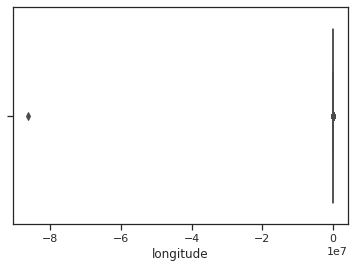

In [ ]:
# El histograma de la longitud
sns.boxplot(x=df_pw_2["longitude"]);

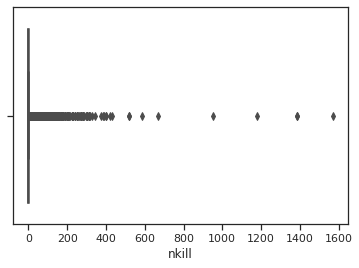

In [ ]:
# El histograma de las muertes
sns.boxplot(x=df_pw_2["nkill"]);

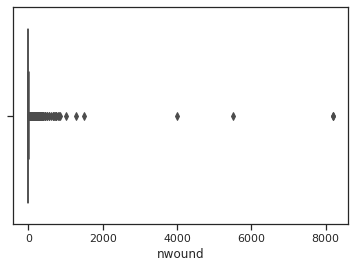

In [ ]:
# El histograma de las personas heridas
sns.boxplot(x=df_pw_2["nwound"]);

### 2. Filtrado con el IQR

Primero, puede notarse que hay un sólo valor que es completamente anómalo en la columna de longitude, por lo tanto, se filtrará ese valor.

In [ ]:
# Para el filtro, se usará que la longitud geográfica toma valores
# entre -180 y 180
df = df[df["longitude"]>=-180]

In [ ]:
# El promedio del longitude corregido
mean_longitude = df["longitude"].mean()
mean_longitude

27.96636483334984

Ahora se estudiará tanto nwound y nkill. Como puede notarse, ambas variables numéricas cuentan con demasiados valores atípicos, por lo que sí es razonable filtrarlos.

In [ ]:
# Se filtra nkill
filtro_inferior = df['nkill'] > df['nkill'].quantile(0.25) - (iqr["nkill"] * 1.5)
filtro_superior = df['nkill'] < df['nkill'].quantile(0.75) + (iqr['nkill'] * 1.5)

df_pw_2_filtro_1 = df[filtro_inferior & filtro_superior]

In [ ]:
# El promedio del nkill filtrado
mean_nkill = df_pw_2_filtro_1["nkill"].mean()
mean_nkill

0.7116650764972967

In [ ]:
# La mediana del nkill filtrado
median_nkill = df_pw_2_filtro_1["nkill"].median()
median_nkill

0.0

In [ ]:
# La desviación del nkill filtrado
std_nkill = df_pw_2_filtro_1["nkill"].std()
std_nkill

1.0422999302750098

En este caso, puede verse que la columna de nkill ya presenta un comportamiento que sí representa a la mayoría de los puntos (pues oscilan entre 0 y 4, como se verá en el siguiente punto de los histogramas).

In [ ]:
# Se filtra nwound
filtro_inferior = df['nwound'] > df['nwound'].quantile(0.25) - (iqr["nwound"] * 1.5)
filtro_superior = df['nwound'] < df['nwound'].quantile(0.75) + (iqr['nwound'] * 1.5)

df_pw_2_filtro_2 = df[filtro_inferior & filtro_superior]

In [ ]:
# El promedio del nwound filtrado
mean_nwound = df_pw_2_filtro_2["nwound"].mean()
mean_nwound

0.5574204240657687

In [ ]:
# La mediana del nwound filtrado
median_nwound = df_pw_2_filtro_2["nwound"].median()
median_nwound

0.0

In [ ]:
# La desviación estándar del nwound filtrado
std_nwound = df_pw_2_filtro_2["nwound"].std()
std_nwound

1.06104099547

Puede verse que la columna de nwoundya presenta un comportamiento que sí representa a la mayoría de los puntos (pues oscilan entre 0 y 4, como se verá en el siguiente punto de los histogramas).

### 3. Tablas de frecuencia e histogramas

Para las variables más simétricas (imonth y iday) se usarán tablas de frecuencias.

In [ ]:
# La tabla de los meses
segmentos = pd.cut(df_pw_2["imonth"], 12)
df_pw_2['imonth'].groupby(segmentos).count()

imonth
(0.989, 1.917]      14842
(1.917, 2.833]      13817
(2.833, 3.75]       15195
(3.75, 4.667]       15072
(4.667, 5.583]      16809
(5.583, 6.5]        15295
(6.5, 7.417]        16217
(7.417, 8.333]      15733
(8.333, 9.25]       14099
(9.25, 10.167]      15474
(10.167, 11.083]    14822
(11.083, 12.0]      13425
Name: imonth, dtype: int64

In [ ]:
# La tabla de los días
segmentos = pd.cut(df_pw_2["iday"], 31)
df_pw_2['iday'].groupby(segmentos).count()

iday
(0.97, 1.968]       6344
(1.968, 2.935]      5954
(2.935, 3.903]      6011
(3.903, 4.871]      6153
(4.871, 5.839]      5844
(5.839, 6.806]      5781
(6.806, 7.774]      5997
(7.774, 8.742]      5859
(8.742, 9.71]       6057
(9.71, 10.677]      6064
(10.677, 11.645]    5936
(11.645, 12.613]    6012
(12.613, 13.581]    6043
(13.581, 14.548]    6028
(14.548, 15.516]    6500
(15.516, 16.484]    6112
(16.484, 17.452]    5852
(17.452, 18.419]    5880
(18.419, 19.387]    5973
(19.387, 20.355]    5930
(20.355, 21.323]    5827
(21.323, 22.29]     5799
(22.29, 23.258]     5782
(23.258, 24.226]    5752
(24.226, 25.194]    5875
(25.194, 26.161]    5823
(26.161, 27.129]    5937
(27.129, 28.097]    6027
(28.097, 29.065]    5507
(29.065, 30.032]    5046
(30.032, 31.0]      3095
Name: iday, dtype: int64

Como se mencionó en el postwork 1, ambas variables parecen simétricas. De hecho, ambas variables muestran un comportamiento aproximadamente constante -o uniforme- (salvo el término del día 31 en la parte de los días, pues ese término aparece más o menos la mitad de las veces que los demás días y, en consecuencia, contiene una frecuencia de la mitad de las demás frecuencias).

Para iyear, se usará un histograma.

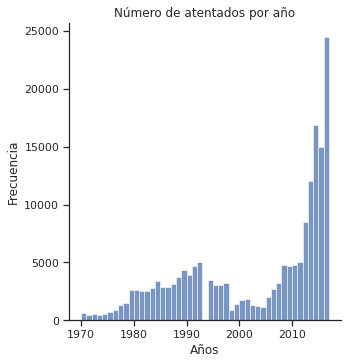

In [ ]:
# Histograma de los atentados a lo largo de los años
n_years = len(df_pw_2["iyear"].unique())
ax = sns.displot(df_pw_2["iyear"], bins=n_years);
ax.set(xlabel="Años", ylabel="Frecuencia", title="Número de atentados por año");

Recuerde que el dataset no tiene datos de 1993, de acuerdo a su documentación.

Note que no se sigue una distribución conocida (aunque hasta mediados de la década de los 2000 puede parecer que había una distribución aproximadamente normal centrada en torno a 1992). Sin embargo, se nota que a partir del 2010 hubo un incremento en el número de atentados.

Para revisar la supuesta normalidad de los datos de la frecuencia de los años previos a 2005, se puede calcular el sesgo y la curtosis de las frecuencias en esos años.

In [ ]:
years = df_pw_2[ df_pw_2["iyear"]<2005 ]["iyear"]

years.skew(), years.kurtosis()

(-0.10568468145348542, -0.5426767027561485)

El sesgo puede no ser tan significante por la ausencia de los datos de 1993, sin embargo parece ser que, a pesar de la ausencia de ese año, la distribución está sesgada hacia ese lado de los datos (pues tiene una asimetría negativa). Aunque también se debe a que en 2005 se hace un corte súbito de la campana.

La curtosis sí es considerablemente menor a cero, por lo que puede suponerse que incluso si se tuvieran los datos de 1993 y la campana no estuviera "cortada", se tendría una distribución platicúrtica.

Por lo tanto, aunque la distribución de hasta antes de 2005 tiene forma de campana, no es una gaussiana.

También para nkill y nwound se usará un histograma.

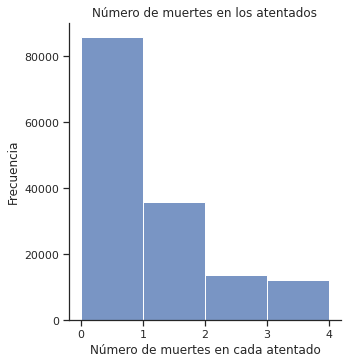

In [ ]:
# Histograma de las muertes
ax = sns.displot(df_pw_2_filtro_1["nkill"], bins=4);
ax.set(xlabel="Número de muertes en cada atentado", ylabel="Frecuencia", title="Número de muertes en los atentados");

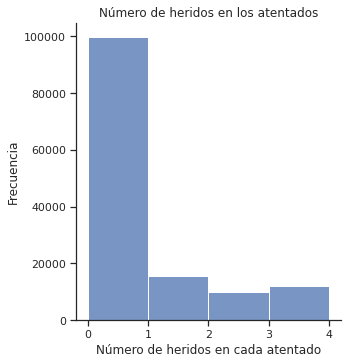

In [ ]:
# Histograma de las personas heridas
ax = sns.displot(df_pw_2_filtro_2["nwound"], bins=4);
ax.set(xlabel="Número de heridos en cada atentado", ylabel="Frecuencia", title="Número de heridos en los atentados");

En el caso de nkill parece tratarse de una distribución exponencial mientras que en el caso de nwound puede tratarse también de una distribución que parece ser exponencial. En consecuencia, ambas distribuciones están sesgadas positivamente.

### 4. Gráficas de densidad

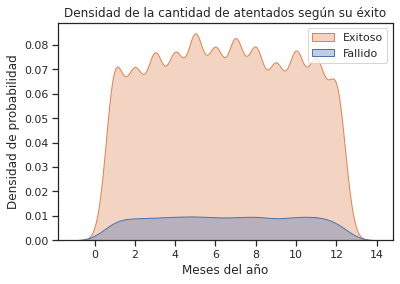

In [ ]:
ax = sns.kdeplot(data=df, x="imonth", hue="success",
            fill=True, alpha=0.35, label=True, bw_adjust=1.45)
ax.set(xlabel="Meses del año", ylabel="Densidad de probabilidad",
       title="Densidad de la cantidad de atentados según su éxito")

plt.legend(labels=["Exitoso", "Fallido"])

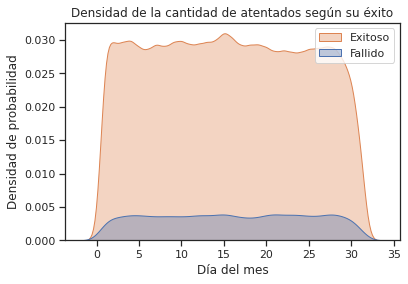

In [ ]:
ax = sns.kdeplot(data=df, x="iday", hue="success",
            fill=True, alpha=0.35, label=True, bw_adjust=0.8)
ax.set(xlabel="Día del mes", ylabel="Densidad de probabilidad",
       title="Densidad de la cantidad de atentados según su éxito")

plt.legend(labels=["Exitoso", "Fallido"])

Con la gráfica anterior puede verse que tanto la distribución de los atentados exitosos y los fallidos son aproximadamente constantes en los meses. Sin embargo, resulta claro que la mayoría de los atentados registrados fueron exitosos.

Lo mismo se puede obeservar en el caso de la distribución en términos de los días

En el siguiente par de gráficas, el éxito o el fracaso de un atentado parece no depender del número de muertes o el número de personas heridas. Esto es porque, en ambos casos, la densidad relacionada con los atentados exitosos tiene una forma similar a la desidad asociada con los atentados fallidos pero en un tamaño distinto (que se sospecha que está asociado con la proporción entre los éxitos y fallos).

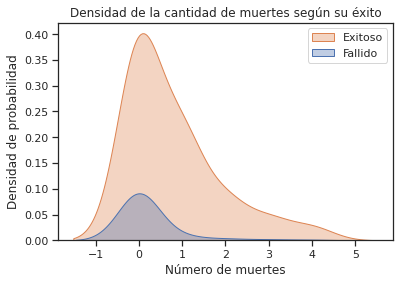

In [ ]:
ax = sns.kdeplot(data=df_pw_2_filtro_1, x="nkill", hue="success",
                 fill=True, alpha=0.35, label=True, bw_adjust=5)
ax.set(xlabel="Número de muertes", ylabel="Densidad de probabilidad",
       title="Densidad de la cantidad de muertes según su éxito")

plt.legend(labels=["Exitoso", "Fallido"])

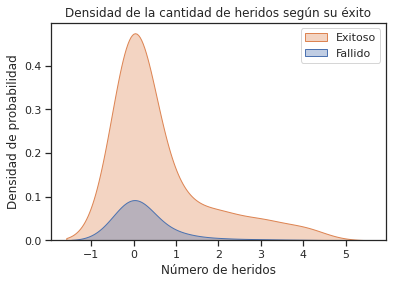

In [ ]:
ax = sns.kdeplot(data=df_pw_2_filtro_2, x="nwound", hue="success",
                 fill=True, alpha=0.35, label=True, bw_adjust=5)
ax.set(xlabel="Número de heridos", ylabel="Densidad de probabilidad",
       title="Densidad de la cantidad de heridos según su éxito")

plt.legend(labels=["Exitoso", "Fallido"])

## Postwork 03: Exploración de Variables Categóricas y Análisis Multivariable

1. Identifica todas las variables categóricas en tu dataset.

2. Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.

3. Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?

4. Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.

5. Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.


### 1. Identifica todas las variables categóricas en tu dataset.

In [ ]:
df.dtypes

eventid              int64
iyear                int64
imonth               int64
iday                 int64
country_txt         object
region_txt          object
latitude           float64
longitude          float64
success              int64
suicide              int64
attacktype1          int64
attacktype1_txt     object
targtype1            int64
targtype1_txt       object
weaptype1            int64
weaptype1_txt       object
nkill              float64
nwound             float64
dtype: object

Note que, aunque hay columnas con valores numéricos, casi todas representan variables categóricas. Todas las columnas salvo iyear, imonth, iday, nkill y nwound son categóricas. Tampoco será necesario tomar en consideración eventid.

In [ ]:
df_pw_3 = df.drop(["eventid", "iyear", "imonth", "iday", "latitude", "longitude", "nkill", "nwound"], axis=1)

### 2. Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


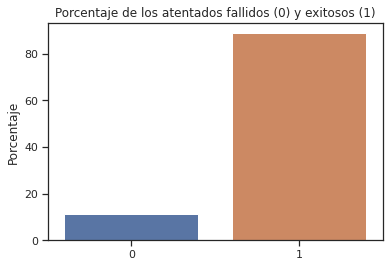

In [ ]:
# Porcentaje para los atentados exitosos
counts = df_pw_3['success'].value_counts()
as_percentages = counts * 100 / counts.sum()

ax = sns.barplot(as_percentages.index, as_percentages)
ax.set_title('Porcentaje de los atentados fallidos (0) y exitosos (1)')
ax.set(ylabel='Porcentaje');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


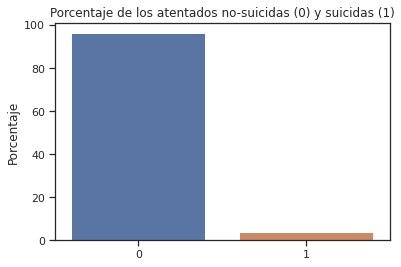

In [ ]:
# Porcentaje para los atentados suicidas
counts = df_pw_3['suicide'].value_counts()
as_percentages = counts * 100 / counts.sum()

ax = sns.barplot(as_percentages.index, as_percentages)
ax.set_title('Porcentaje de los atentados no-suicidas (0) y suicidas (1)')
ax.set(ylabel='Porcentaje');

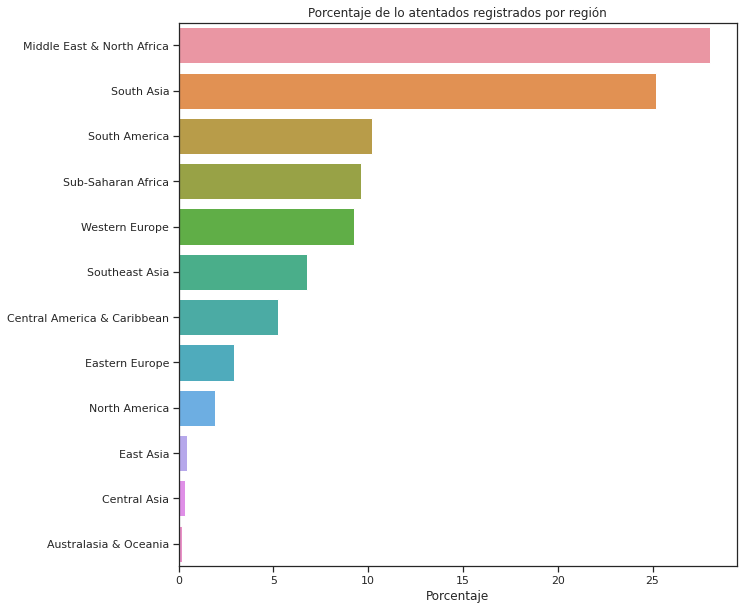

In [ ]:
# Porcentaje de atentados por región
counts = df_pw_3['region_txt'].value_counts()
as_percentages = counts * 100 / counts.sum()

plt.subplots(figsize=(10,10))

ax = sns.barplot(x=as_percentages, y=as_percentages.index, orient="h");
ax.set_title('Porcentaje de lo atentados registrados por región');
ax.set(xlabel='Porcentaje');

### 3. Planea tu análisis multivariable

Es interesante revisar si el éxito del atentado así como si fue suicida o no depende de la región geográfica así como si el número de muertes y heridos depende del arma usada en el atentado. También se puede revisar la distribución de frecuencias de atentados en términos geográficos.

### 4. Utiliza tablas de contingecia y gráficas en la misma figura para explorar

In [ ]:
# Tabla de contigencia del éxito de los atentados y si fueron suicidas
pd.crosstab(df["success"], df["suicide"])

suicide,0,1
success,,
0,18693,1059
1,151032,5545


In [ ]:
# Tabla de contigencia del éxito de los atentados y si fueron suicidas
pd.crosstab(df["region_txt"], [df["success"], df["suicide"]])

success                         0           1      
suicide                         0    1      0     1
region_txt                                         
Australasia & Oceania          35    1    235     0
Central America & Caribbean   351    0   8918     1
Central Asia                   55    1    481    10
East Asia                     119    1    647    16
Eastern Europe                695    7   4322    85
Middle East & North Africa   5392  663  40292  3091
North America                 554    1   2841    15
South America                1317    0  16668     6
South Asia                   5280  290  37175  1629
Southeast Asia               1310    3  10568    25
Sub-Saharan Africa           1155   89  15039   647
Western Europe               2430    3  13846    20

In [ ]:
# Tabla de contingencia del tipo de atentado y el tipo de arma usada
pd.crosstab(df["attacktype1_txt"], df["weaptype1_txt"])

weaptype1_txt,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
attacktype1_txt,,,,,,,,,,,,
Armed Assault,0,2,1962,0,35296,2143,1450,3,0,2,130,7
Assassination,0,14,3161,0,13254,133,759,4,0,1,1369,14
Bombing/Explosion,0,64,85146,5,721,207,6,3,0,2,383,1
Facility/Infrastructure Attack,1,24,6,2,1101,8152,113,21,0,119,550,17
Hijacking,0,0,69,18,327,22,31,0,0,0,154,5
Hostage Taking (Barricade Incident),0,2,131,0,614,38,27,1,0,1,143,0
Hostage Taking (Kidnapping),0,4,217,3,5086,133,574,34,0,2,4506,0
Unarmed Assault,30,181,2,2,0,35,580,44,13,0,0,91
Unknown,0,0,0,1,7,0,1,0,0,0,6852,0


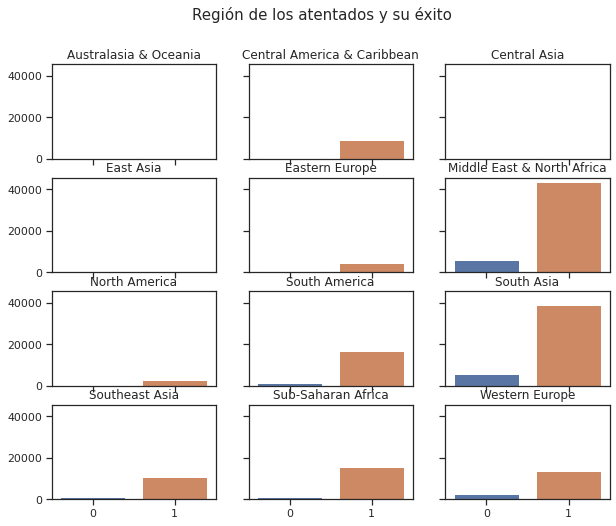

In [ ]:
# Gráfica de contigencia del éxito de los atentados y su región
crosstab = pd.crosstab(df["region_txt"], df["success"])

fig, axes = plt.subplots(4, 3, figsize=(10, 8), sharex=True, sharey=True)

for i in range(4):
  for j in range(3):
    index = int(j+3*i)
    sns.barplot(x=crosstab.columns, y=crosstab.iloc[index], ax=axes[i, j])

for i in range(4):
  for j in range(3):
    index = int(j+3*i)
    axes[i, j].set(xlabel='', ylabel='', title=crosstab.index[index])

fig.suptitle('Región de los atentados y su éxito', fontsize=15);

### 5. Utiliza boxplots y violinplots

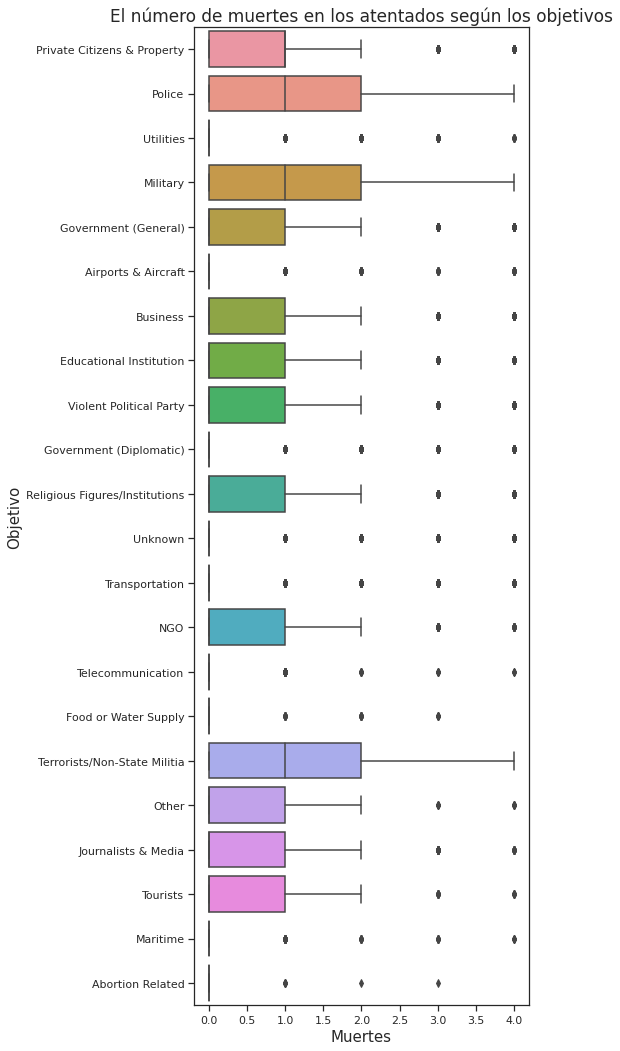

In [ ]:
# Tipo de objetivo y muertes
plt.figure(figsize=(6, 18))
sns.boxplot(data=df_pw_2_filtro_1, y='targtype1_txt', x='nkill');

plt.ylabel("Objetivo", fontsize=15)
plt.xlabel("Muertes", fontsize=15)
plt.title("El número de muertes en los atentados según los objetivos", fontsize=17);

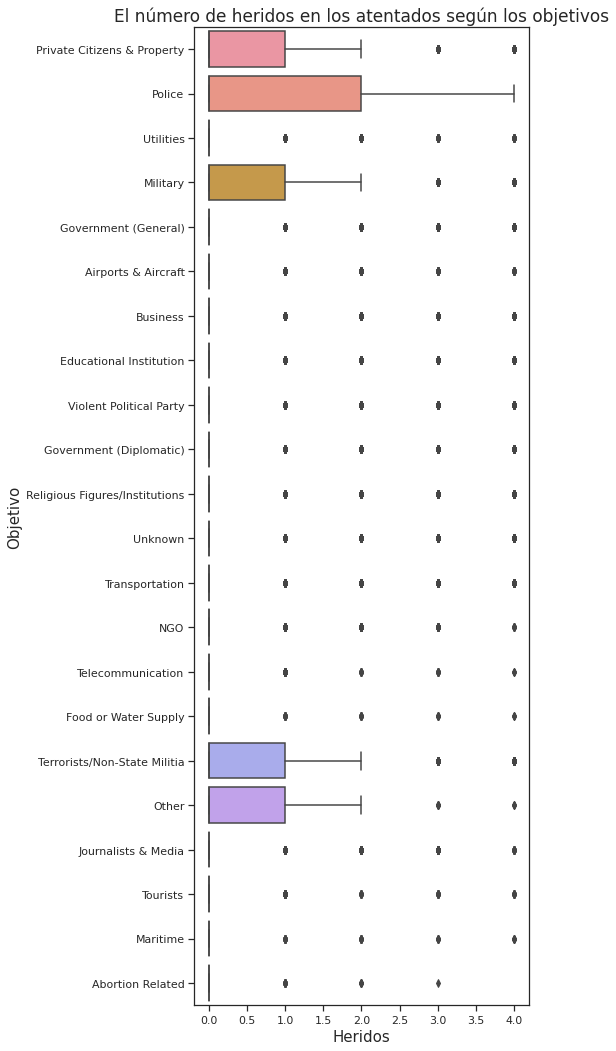

In [ ]:
# Tipo de objetivo y heridos
plt.figure(figsize=(6, 18))
sns.boxplot(data=df_pw_2_filtro_2, y='targtype1_txt', x='nwound');

plt.ylabel("Objetivo", fontsize=15)
plt.xlabel("Heridos", fontsize=15)
plt.title("El número de heridos en los atentados según los objetivos", fontsize=17);

Text(0.5, 1.0, 'Distribución latitudinal de los distintos tipos de atentado')

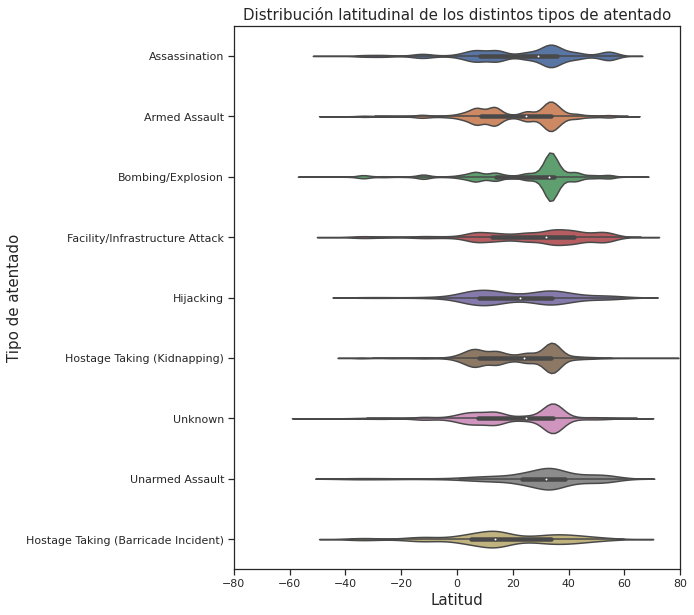

In [ ]:
plt.figure(figsize=(8, 10))
sns.violinplot(data=df, y='attacktype1_txt', x='latitude');
plt.xlim(-80,80);

plt.ylabel("Tipo de atentado", fontsize=15)
plt.xlabel("Latitud", fontsize=15)
plt.title("Distribución latitudinal de los distintos tipos de atentado", fontsize=15)

Text(0.5, 1.0, 'Distribución longitudinal de los distintos tipos de atentado')

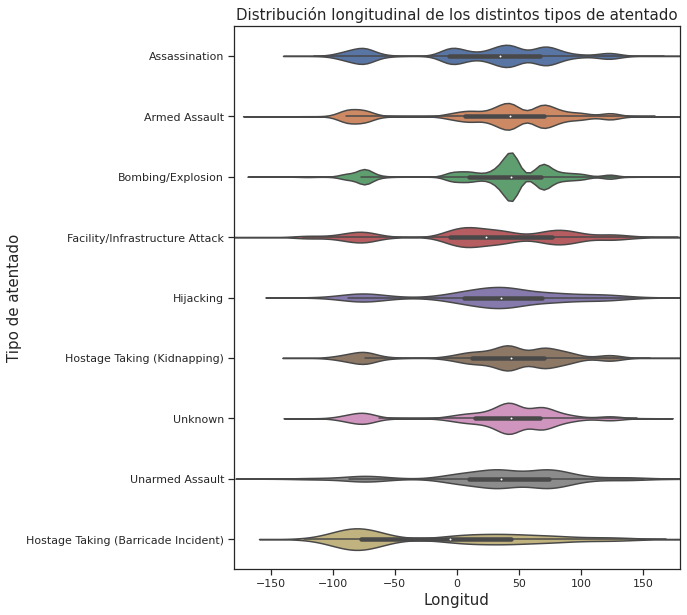

In [ ]:
plt.figure(figsize=(8, 10))
sns.violinplot(data=df, y='attacktype1_txt', x='longitude');
plt.xlim(-180, 180);

plt.ylabel("Tipo de atentado", fontsize=15)
plt.xlabel("Longitud", fontsize=15)
plt.title("Distribución longitudinal de los distintos tipos de atentado", fontsize=15)

## _(Opcional)_ Postwork 04: Correlaciones y Regresión Lineal Simple



1. Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.

2. Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

### 1. Matriz de correlaciones y pairplot

In [ ]:
# Se obtiene un dataframe que no tiene outliers ni en nwound ni en nkill
df_pw_4 = df_pw_2_filtro_1.copy()

iqr = df_pw_4['nwound'].quantile(0.75) - df_pw_4['nwound'].quantile(0.25)
filtro_inferior = df_pw_4['nwound'] > df_pw_4['nwound'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df_pw_4['nwound'] < df_pw_4['nwound'].quantile(0.75) + (iqr * 1.5)

df_pw_4 = df_pw_4[filtro_inferior & filtro_superior].drop(["eventid"], axis=1)

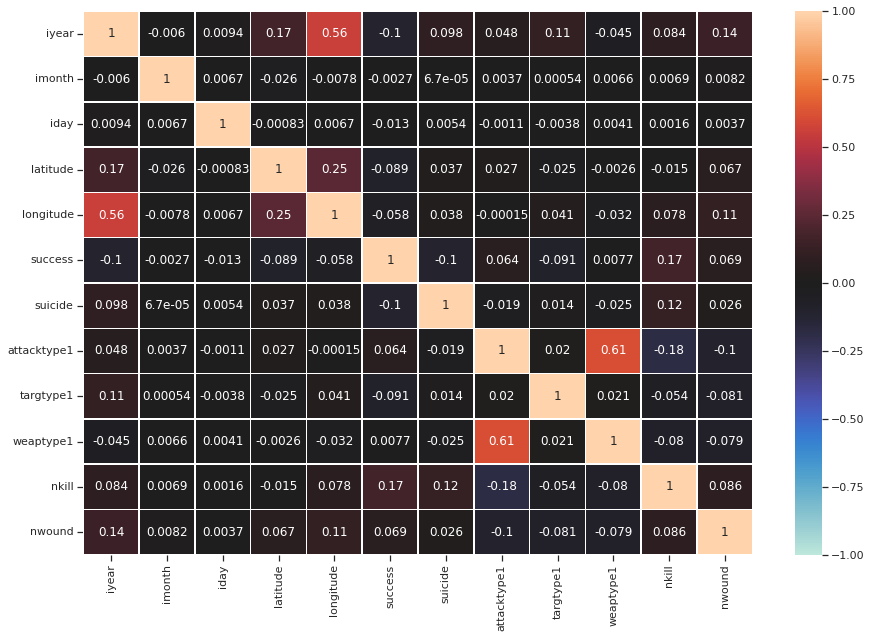

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df_pw_4.corr(), vmin=-1, vmax=1, annot=True, cmap="icefire", linewidths=.5);

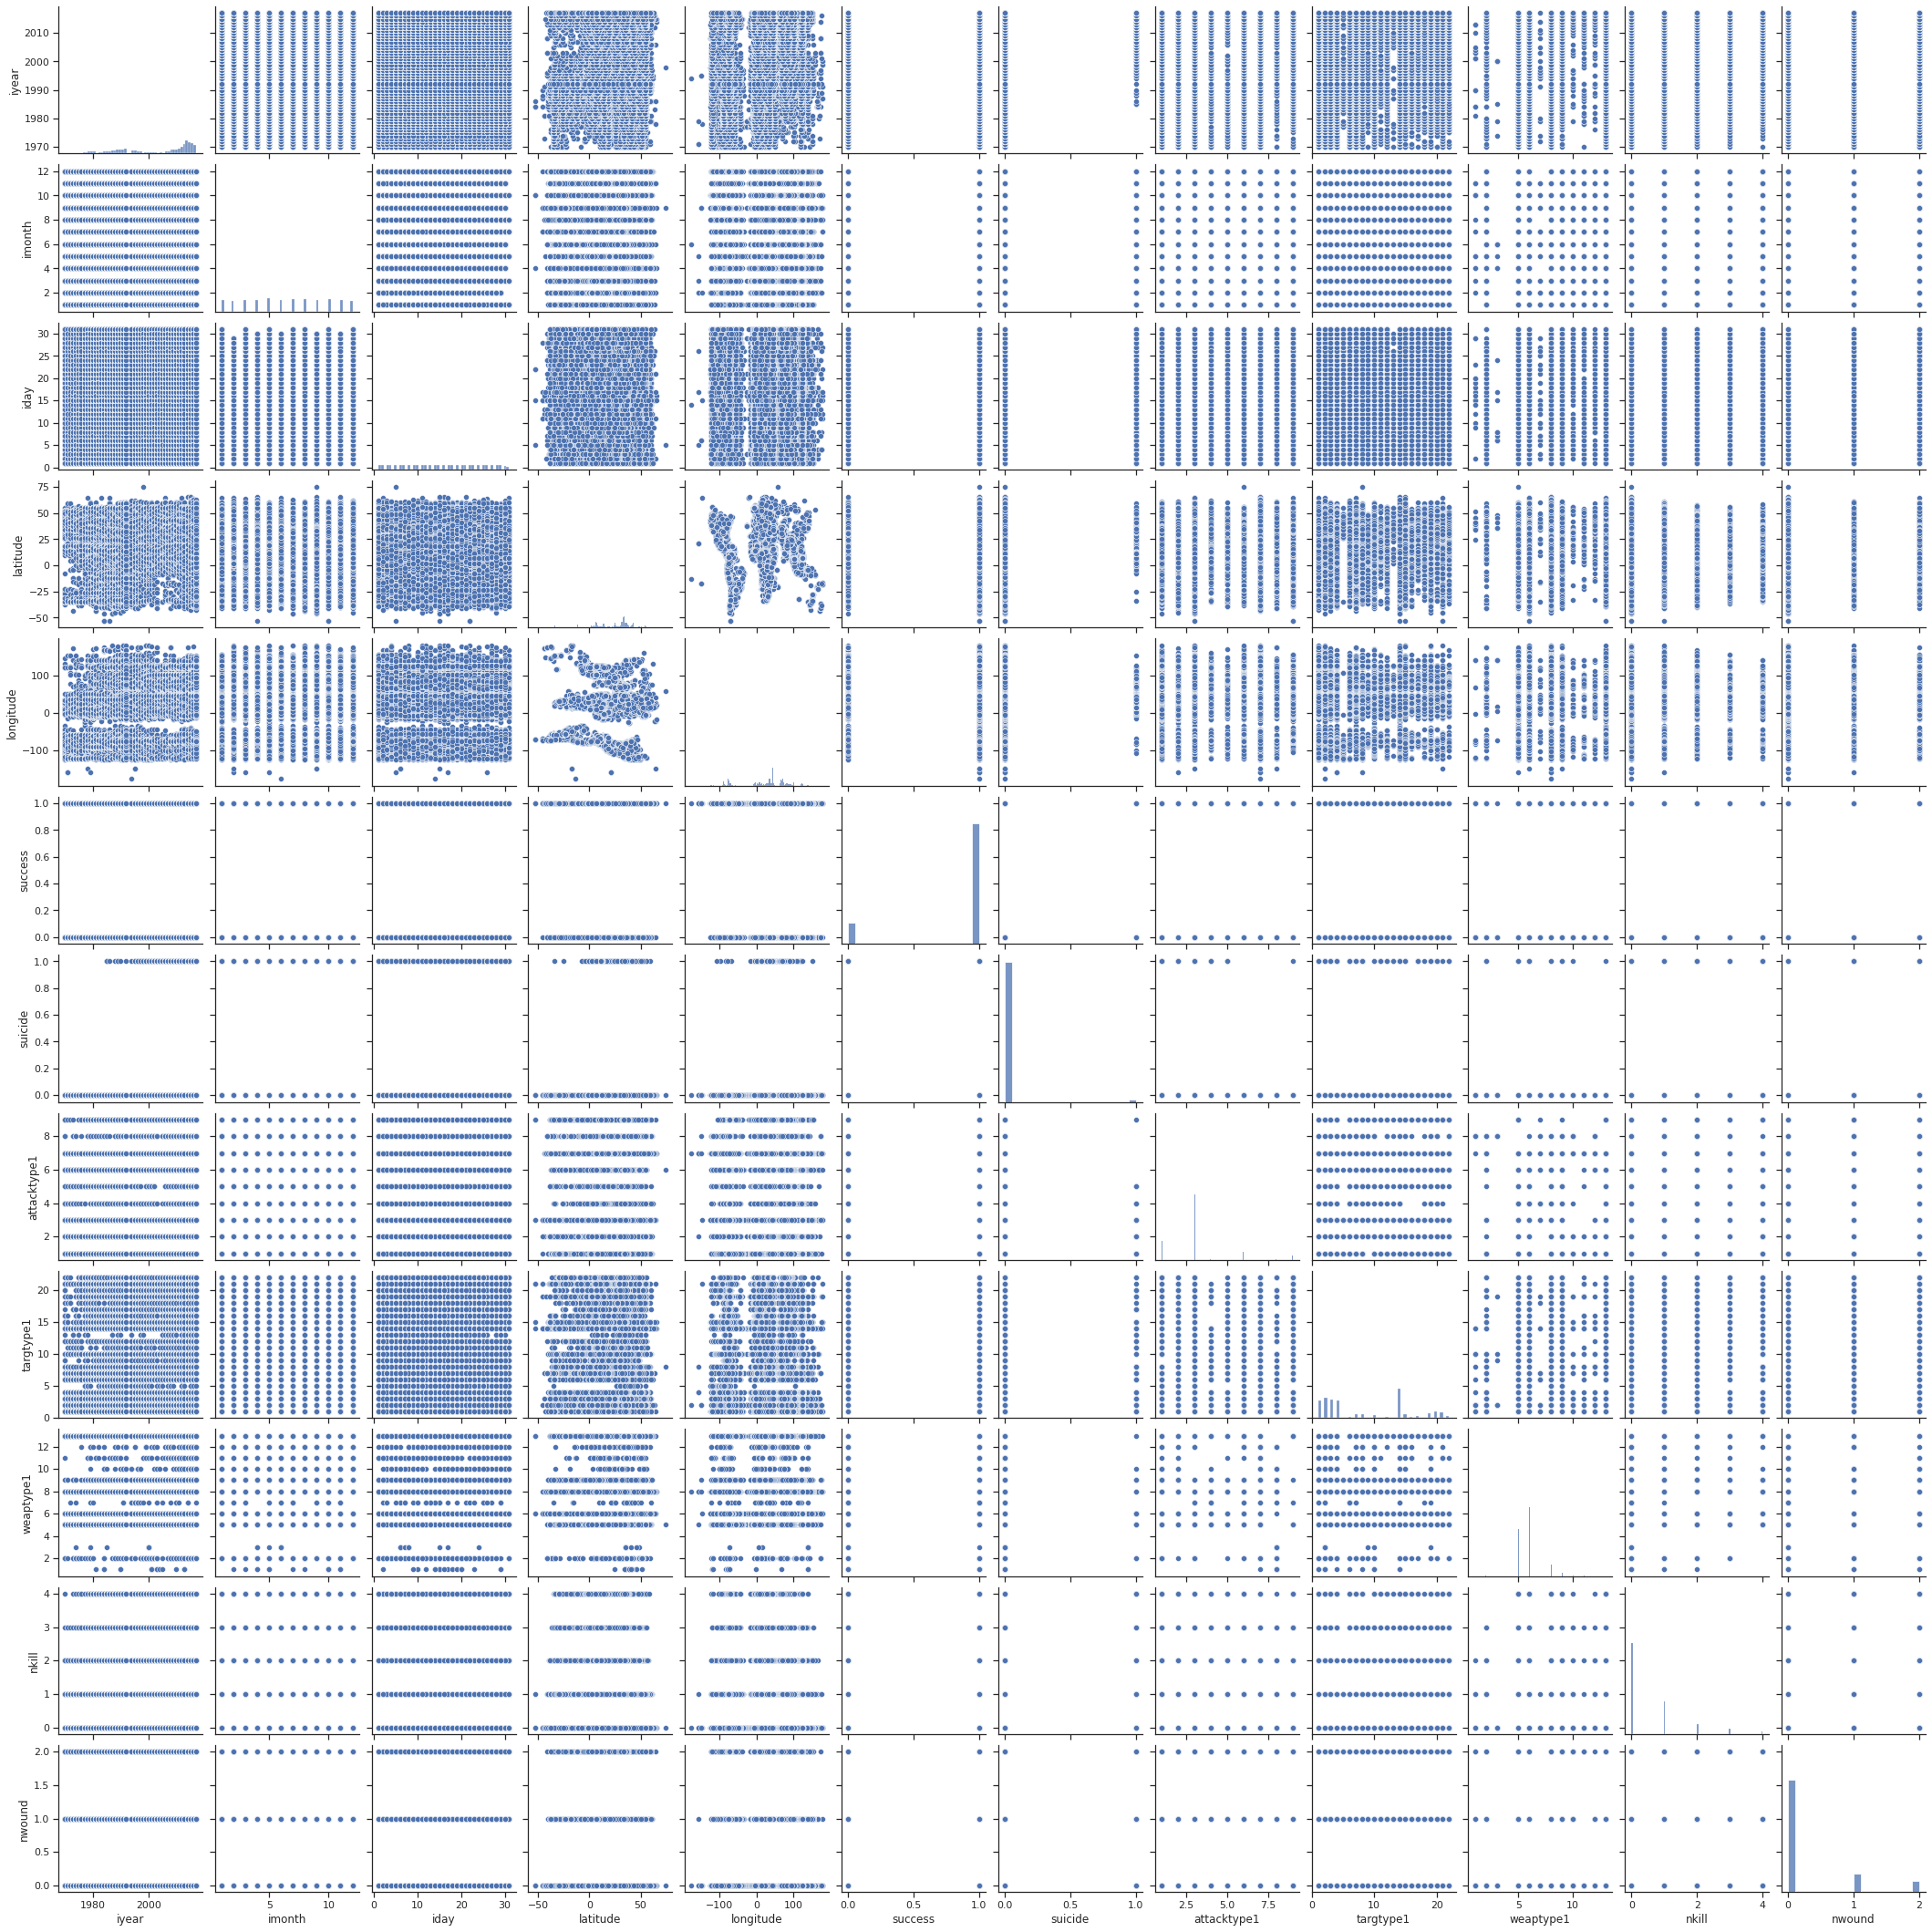

In [ ]:
sns.pairplot(df_pw_4);

### 2. Regresión lineal

Aunque por la matriz de correlación y el pairplot se puede ver que los datos no son aptos para una regresión lineal, se realizarán un par con tal de practicar.

Primero, con el número de muertes y el éxito del atentado.

In [ ]:
# Se define y ajusta el modelo
lr = LinearRegression(normalize=True)
lr.fit(df_pw_4["nkill"].to_frame(), df_pw_4["success"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
# Se evalúan los valores teóricos
y_predict = lr.predict(df_pw_4["nkill"].to_frame())

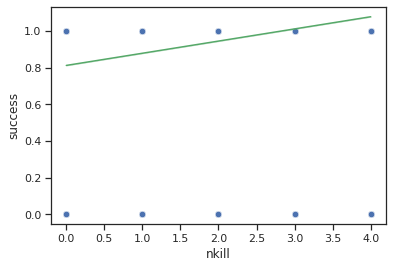

In [ ]:
# Se compara gráficamente el modelo con los datos reales
sns.scatterplot(x=df_pw_4['nkill'], y=df_pw_4['success'], s=40);
sns.lineplot(x=df_pw_4['nkill'], y=y_predict, color='g');

In [ ]:
# Se evalúa el modelo
lr.score(df_pw_4["nkill"].to_frame(), df_pw_4["success"])

0.03008337369480196

El siguiente ajuste será con el tipo de atentado y el tipo de arma (en su versión numérica, aunque son variables categóricas)

In [ ]:
# Se define y ajusta el modelo
lr = LinearRegression()
lr.fit(df_pw_4["weaptype1"].to_frame(), df_pw_4["attacktype1"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Se evalúan los valores teóricos
y_predict = lr.predict(df_pw_4["weaptype1"].to_frame())

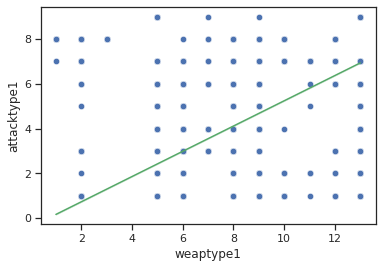

In [ ]:
# Se compara gráficamente el modelo con los datos reales
sns.scatterplot(x=df_pw_4['weaptype1'], y=df_pw_4['attacktype1'], s=40);
sns.lineplot(x=df_pw_4['weaptype1'], y=y_predict, color='g');

In [ ]:
# Se evalúa el modelo
lr.score(df_pw_4["weaptype1"].to_frame(), df_pw_4["attacktype1"])

0.376235670404535

## Postwork 05: Distribuciones muestrales y técnicas de evaluación de modelos

1. Utilizando la técnica de bootstrap, explora las distribuciones muestrales de las estadísticas que obtuviste anteriormente y reporta:
  - La distribución, su asimetría y curtosis

  - El error estándar

  - El intervalo de confianza que te parezca más apropiado

2. Si tiene sentido, elige algunas de tus variables numéricas para entrenar uno o más modelos de Regresión Lineal Múltiple. Utiliza las técnicas de división de dataset y validación cruzada de K-iteraciones para asegurarte de que tu modelo generalice.

En el Postwork 01 se obtuvieron los estimados de locación y variabilidad de nuestras variables numéricas, por lo que ahora se analizarán la incertidumbre y los sesgos que existen en estas medidas, mediante la exploración de sus distribuciones muestrales.

### 1. Bootstrap

Recordando brevemente, la técnica de Bootstrap consiste en la generación de remuestreos y nos ayuda a generar las distribuciones muestrales de nuestras estadísticas.

#### Distribución, asimetría y curtosis

In [ ]:
# Para obtener las distribuciones se crearán dos funciones, una para obtener las medias y otra para las medianas.

In [ ]:
# Para las medias, se tendría:

def bootstrap_mean(num, itera, data):
    media=[]
    for i in range(itera):
        muestra=data.sample(n=num, replace=True)
        media_int=muestra.mean()
        media.append(media_int)
    pd.Series(media).hist(bins=30)
    return pd.Series(media)

In [ ]:
# Para las medianas, se tendría:

def bootstrap_median(num, itera, data):
    mediana=[]
    for i in range(itera):
        muestra=data.sample(n=num, replace=True)
        mediana_int=muestra.median()
        mediana.append(mediana_int)
    pd.Series(mediana).hist(bins=30)
    return pd.Series(mediana)
    
    

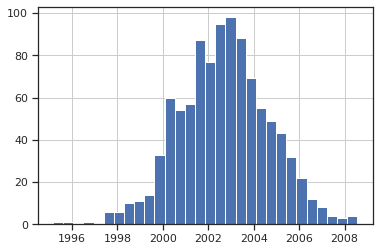

In [ ]:
# Para la columna 'iyear' la distribucion muestral de las medias sería:
means_year=bootstrap_mean(50,1000, df_pw_1['iyear'])

In [ ]:
# La asimetría 
means_year.skew()

-0.03054718654407229

In [ ]:
# La curtosis
means_year.kurtosis()

0.11302006173905532

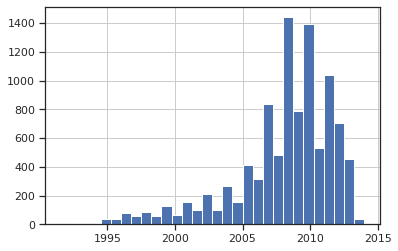

In [ ]:
# La distribución muestral de las medianas para 'iyear':
medians_year=bootstrap_median(50, 10000, df_pw_1['iyear'])

In [ ]:
# Asimetría
medians_year.skew()

-1.3669345078038575

In [ ]:
# Curtosis
medians_year.kurtosis()

2.0618134605385126

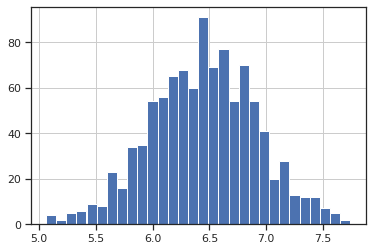

In [ ]:
# La distribución muestral de las medias para 'imonth'.
means_month=bootstrap_mean(50,1000, df_pw_1['imonth'])


In [ ]:
# Asimetría
means_month.skew()

-0.05262647595632389

In [ ]:
# Curtosis
means_month.kurtosis()

-0.06216283130595013

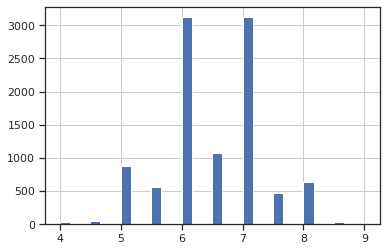

In [ ]:
# La distribución muestral de la mediana para los meses.
medians_month=bootstrap_median(50, 10000, df_pw_1['imonth'])

In [ ]:
# Asimetría 
medians_month.skew()

-0.037084781721032384

In [ ]:
# Curtosis
medians_month.kurtosis()

-0.18367190344307094

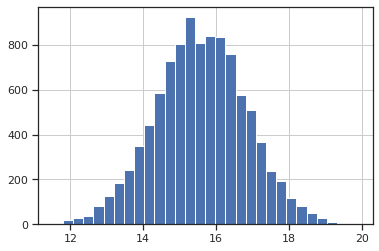

In [ ]:
# La distribución muestral de las medias para 'iday'
means_day=bootstrap_mean(50,10000, df_pw_1['iday'])

In [ ]:
means_day.skew()

-0.016505946753711902

In [ ]:
means_day.kurtosis()

-0.050133433771184066

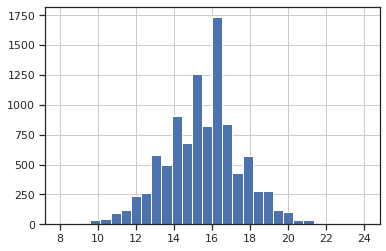

In [ ]:
# La distribución muestral de las medianas para 'iday'
medians_day=bootstrap_median(50, 10000, df_pw_1['iday'])

In [ ]:
medians_day.skew()

0.04438692220063744

In [ ]:
medians_day.kurtosis()

0.034366897195817536

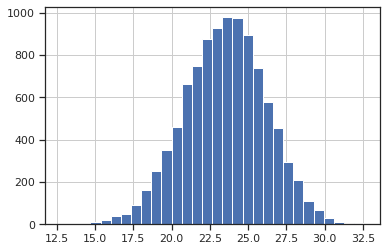

In [ ]:
# La distribución muestral de las medias para 'latitud'
means_latitud=bootstrap_mean(50, 10000, df_pw_1['latitude'])

In [ ]:
means_latitud.skew()

-0.12089790825544396

In [ ]:
means_latitud.kurtosis()

-0.034728140576238076

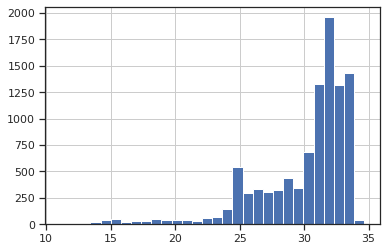

In [ ]:
# La distribución muestral de las medianas para 'latitud'
medians_latitud=bootstrap_median(50, 10000, df_pw_1['latitude'])

In [ ]:
print( medians_latitud.skew(), medians_latitud.kurtosis)

-1.7866290231028292 <bound method Series.kurt of 0       32.073314
1       30.765809
2       31.300580
3       26.514073
4       31.058798
          ...    
9995    24.891115
9996    24.798346
9997    29.137710
9998    31.528200
9999    31.659114
Length: 10000, dtype: float64>


In [ ]:
# La distribución muestral de las medias para 'longitud'
bootstrap_mean(50, 500, df_pw_1['longitude'])

In [ ]:
# La distribución muestral de las medianas para 'longitude'
bootstrap_median(10, 1000, df_pw_1['longitude'])

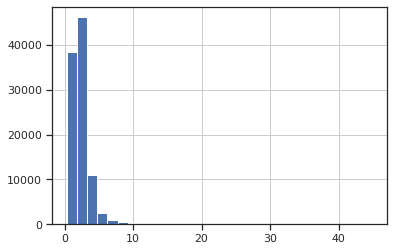

In [ ]:
# La distribución muestral de las medias para 'nkill'
means_nkill=bootstrap_mean(50, 100000, df_pw_1['nkill'])

In [ ]:
# Asimetría
means_nkill.skew()

7.906197298629703

In [ ]:
# Curtosis
means_nkill.kurtosis()

116.99616803651173

In [ ]:
# La distribución muestral de las medianas para 'nkill'
bootstrap_median(1000, 10000, df_pw_1['nkill'])

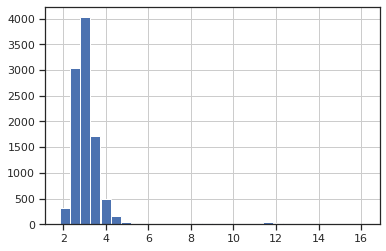

In [ ]:
# La distribución muestral de las medias para 'nwound'
means_nwound=bootstrap_mean(1000, 10000, df_pw_1['nwound'])

In [ ]:
# Asimetría
means_nwound.skew()

5.803445216884771

In [ ]:
# Curtosis
means_nwound.kurtosis()

39.92609772370818

In [ ]:
# La distribución muestral de las medianas para 'nwound'
bootstrap_median(10, 10000, df_pw_1['nwound'])

In [ ]:
#df.nkill.dropna().value_counts()

In [ ]:
#bootstrap_median(5000, 100000, df.nkill.dropna())

#### Error Estándar

In [ ]:
print(f'Error estandar: {means_nkill.std()}')

Error estandar: 1.6921680990427475


In [ ]:
print(f'Valor mínimo: {means_nkill.min()}')
print(f'Valor máximo: {means_nkill.max()}')
print(f'Rango: {means_nkill.max() - means_nkill.min()}')

Valor mínimo: 0.3333333333333333
Valor máximo: 44.787234042553195
Rango: 44.45390070921986


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


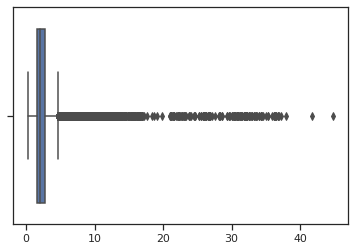

In [ ]:
sns.boxplot(means_nkill);

In [ ]:
print(f'Error estandar: {serie_medians.std()}')

In [ ]:
print(f'Valor mínimo: {serie_medians.min()}')
print(f'Valor máximo: {serie_medians.max()}')
print(f'Rango: {serie_medians.max() - serie_medians.min()}')

In [ ]:
sns.boxplot(serie_medians);

#### Intervalo de Confianza

In [ ]:
limite_inferior = means_nkill.quantile(0.025)
limite_superior = means_nkill.quantile(0.975)

In [ ]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {means_nkill.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 0.9148936170212766 < 2.405268582235308 < 5.877551020408164


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


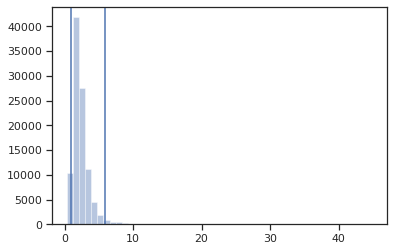

In [ ]:
sns.distplot(means_nkill, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

In [ ]:
imite_inferior = serie_medians.quantile(0.025)
limite_superior = serie_medians.quantile(0.975)

In [ ]:
print(f'Intervalo de 95% confianza de la mediana: {limite_inferior} < {mrts.median()} < {limite_superior}')

In [ ]:
sns.distplot(serie_medians, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

### 2. Regresión lineal múltiple

Como pudo verse en el Postwork 4, el dataset no es apropiado para una regresión lineal.

## Postwork 06: Visualización de datos avanzada



1.   Si hay relaciones jerárquicas que quieras hacer claras o si quieres explorar las proporciones de una variable numérica agrupada en múltiples niveles utiliza un treemap.
2.   Si quieres explorar la relación entre dos variables numéricas divididas por una variable categórica, utiliza scatterplots por categorías o scatterplots con variables condicionantes.
3.  Si quieres explorar la relación entre dos variables numéricas pero tu dataset es tan grande que es imposible definir las densidades de tus datos, utiliza un binning hexagonal.
4.  Si quieres explorar datos geográficos, como definir regiones o puntos en un mapa o visualizar una variable numérica que puede segmentarse por regiones geográficas, utiliza un mapa cloroplético.
5.  Si quieres explorar una variable numérica agrupada en dos niveles por variables categóricas, utiliza una gráfica de barras apiladas.



####Treemaps

En cuanto al uso de treemaps, podemos utilizarlos para representar de mejor manera la cantidad total de muertes, clasificando de acuerdo al tipo de ataque y éxito del mismo, para posteriormente sumar todas las ocurrencias.

In [ ]:
df_grouped = df[['success', 'nkill', 'attacktype1_txt']].copy()
df_grouped['success']

pd.options.mode.chained_assignment = None

for i in df_grouped.index:
  if df_grouped['success'][i] == 1:
    df_grouped['success'][i] = "success"
  else:
    df_grouped['success'][i] = "fail"

df_grouped

fig = px.treemap(df_grouped, path=['attacktype1_txt', 'success'], values='nkill')
fig.show()

#### Mapas cloropléticos

Podemos utilizar los mapas cloropléticos para representar de mejor manera la relación entre la cantidad de atentados y el país en el que sucedieron, similar a lo cual ya se había explorado en el Postwork 3, con la diferencia de que en esa ocasión se utilizaron países y cantidades, en vez de regiones y porcentajes.

In [ ]:
# Atentados por región en mapa cloroplético
#numeric value for each country, used for the color
counts = df_pw_3['country_txt'].value_counts()
dtRegionPer = counts.to_frame()
dtRegionPer = dtRegionPer.rename(columns={'country_txt': 'Counts'})
dtRegionPer["Country"] = dtRegionPer.index

 
#set of geographic regions and their boundary coordinates
state_geo = pd.read_json("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json")
state_geo = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json"

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=counts,
    columns=["Country", "Counts"],
    key_on='feature.properties.name',
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Atentados por país",
).add_to(m)

folium.LayerControl().add_to(m)

m


####Gráficas de Barras Apiladas

Considerando los conocimientos adquiridos en esta sesión, podemos representar nuevamente la gráfica de contingencia del éxito de los atentados y su región, realizada en el Postwork 3, pero ahora por medio de una gráfica de barras apiladas.

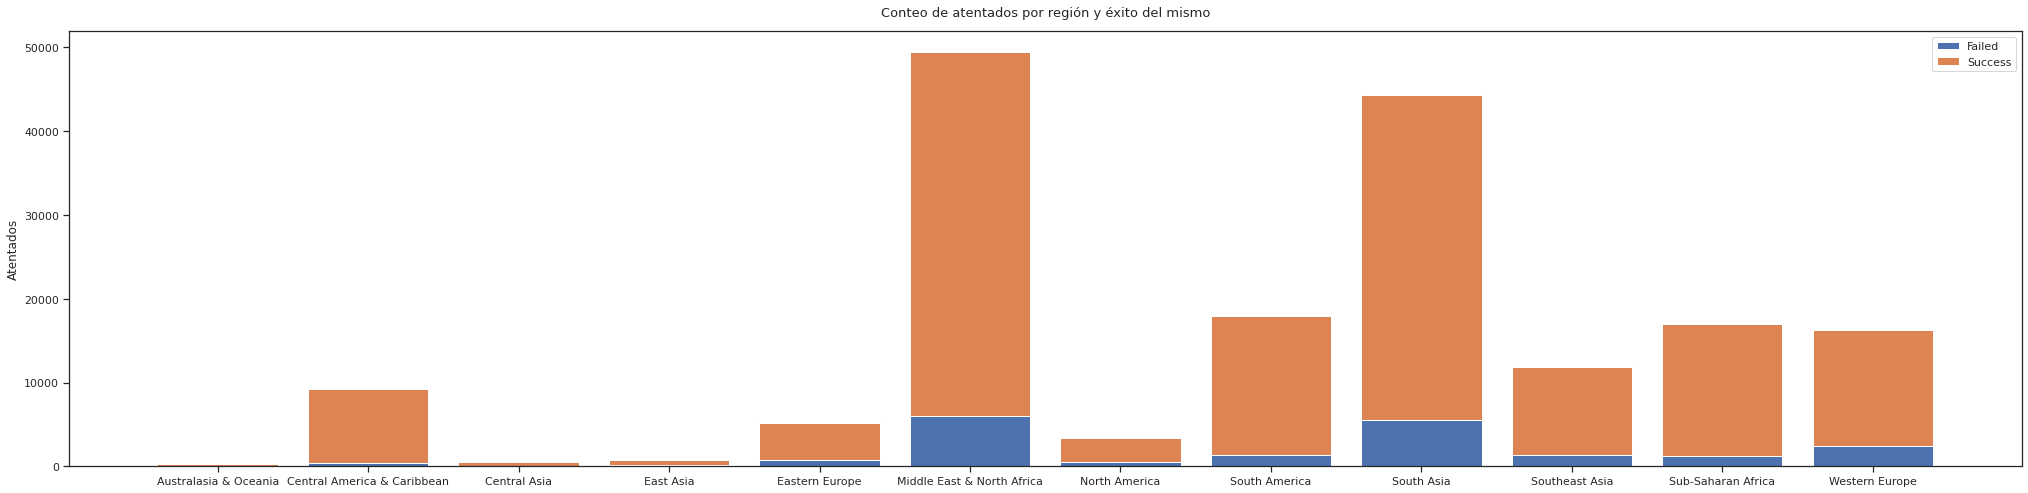

In [ ]:
# Gráfica de contigencia del éxito de los atentados y su región
crosstab = pd.crosstab(df["region_txt"], df["success"])
crosstab

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot()

plt1 = ax.bar(crosstab.index, crosstab[0], label='failed')
plt2 = ax.bar(crosstab.index, crosstab[1], bottom=crosstab[0], label="success")

#plt1 = ax.bar(crosstab[0], crosstab.index, label='failed')
#plt2 = ax.bar(crosstab[1], crosstab.index, bottom=crosstab[0], label="success")

ax.set_ylabel('Atentados')
ax.set_title('Conteo de atentados por región y éxito del mismo', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('Failed', 'Success'));

## Postwork 07: Procesamiento de Lenguaje Natural

Por lo pronto en este Postwork vamos a practicar las técnicas de Procesamiento de Lenguaje Natural que hemos aprendido. Si tu dataset no contiene datos no estructurados, busca un dataset apropiado y realiza los siguientes ejercicios. Si tu dataset contiene datos no estructurados, entonces éste es el momento de agregar PLN a tu proyecto.

Realiza los siguientes procedimientos en caso de que apliquen a tu dataset:


In [ ]:
# Importación de los paquetes necesarios para trabajar en este postwork
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.util import ngrams

In [ ]:
# Vinculación del drive, debido al tamaño del data set original
from google.colab import drive
drive.mount('/content/drive')

El dataset "How People Get Hurt" elegido para este postwork puede ser encontrado en este [enlace](https://www.kaggle.com/jpmiller/how-people-get-hurt). La columna de interés tiene como nombre "Narrative" y describe en lenguaje natural cómo las personas se hicieron daño. 

In [ ]:
Narrative=pd.read_csv('drive/MyDrive/Colab Notebooks/Narrative.csv')

In [ ]:
Narrative=Narrative['Narrative'].dropna()

In [ ]:
Narrative.head()

In [ ]:
# 1. Utiliza patrones Regex para limpiar tus datos estructurados
narrative_clean=Narrative.str.replace('[^\w\s]', '')
narrative_clean=narrative_clean.str.replace('\d','')
narrative_clean=narrative_clean.str.replace('\\n', '')

In [ ]:
narrative_clean.size

Como puede verse en la celda anterior, la variable "Narrative" cuenta con 1,791,854 registros. Esto provoca que el peso del documento sea significativo y tenga repercusiones en el tiempo de cómputo de algunos comandos. Por esta razón, se toma una muestra de 10,000 registros. A continuación, se hacen una serie de ensayos para ilustrar la capacidad representativa de la muestra.

In [ ]:
''' narrative_clean_sample es una muestra limpia de caracteres especiales, números y nan's que se encuentra 
disponible en el repositorio de Github. El tamaño de la muestra es de 10,000 elementos'''

narrative_clean_sample=pd.read_csv('https://github.com/gilesitorr/DataScience3_Bloque4/raw/main/narrative_clean_sample.csv')
narrative_clean_sample=narrative_clean_sample['Narrative']

In [ ]:
narrative_clean[narrative_clean.str.contains('gun', case=False)].size/narrative_clean.size

In [ ]:
narrative_clean_sample[narrative_clean_sample.str.contains('gun', case=False)].size/narrative_clean_sample.size

In [ ]:
narrative_clean[narrative_clean.str.contains('knife', case=False)].size/narrative_clean.size

In [ ]:
narrative_clean_sample[narrative_clean_sample.str.contains('knife', case=False)].size/narrative_clean_sample.size

In [ ]:
narrative_clean[narrative_clean.str.contains('chair', case=False)].size/narrative_clean.size

In [ ]:
narrative_clean_sample[narrative_clean_sample.str.contains('chair', case=False)].size/narrative_clean_sample.size

In [ ]:
narrative_clean[narrative_clean.str.contains('spoon', case=False)].size/narrative_clean.size

In [ ]:
narrative_clean_sample[narrative_clean_sample.str.contains('spoon', case=False)].size/narrative_clean_sample.size

In [ ]:
narrative_clean[narrative_clean.str.contains('pillow', case=False)].size/narrative_clean.size

In [ ]:
narrative_clean_sample[narrative_clean_sample.str.contains('pillow', case=False)].size/narrative_clean_sample.size

In [ ]:
# 2. Genera un objeto Text con la librería nltk y explora los contextos de las 
# palabras que elegiste. Utiliza el método similar para obtener palabras que 
# tengan contextos similares a las palabras originales.
tokenized = narrative_clean_sample.apply(nltk.word_tokenize)

In [ ]:
tokenized=tokenized.map(lambda x: x[1:])

In [ ]:
all_words = tokenized.sum()
text = nltk.Text(all_words)

text

In [ ]:
text.similar('gun')

In [ ]:
text.similar('knife')

In [ ]:
text.concordance('gun', lines=20)

In [ ]:
# 3. Utiliza el objeto FreqDist de nltk para hacer análisis estadístico de tu 
# dataset. Explora las palabras y los bigramas más comunes de tu dataset.

# 4. Realiza visualizaciones de tus conteos de frecuencias utilizando gráficas 
# de barras.
freq_dist = nltk.FreqDist(all_words)

In [ ]:
freq_dist.most_common(20)

In [ ]:
english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]
freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [ ]:
freq_dist_no_stop_words.most_common(20)

In [ ]:
freq_dist_no_stop_words.plot(50, cumulative=False);

In [ ]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], np.array(list(map(lambda x: int(x), most_common_20[:,1]))), ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [ ]:
text = nltk.Text(all_words_except_stop_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

In [ ]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [ ]:

text = nltk.Text(all_words_except_stop_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [ ]:
# 5. Realiza visualizaciones de las distribuciones de frecuencias de las 
# longitudes de las palabras o de las oraciones.
word_lengths = [len(w) for w in all_words_except_stop_words]
sns.distplot(word_lengths, kde=False, norm_hist=False, bins=20);

In [ ]:
sentence_lengths = narrative_clean_sample.apply(lambda x: len(x))
sns.distplot(sentence_lengths, kde=False, norm_hist=False);

In [ ]:
# 6. Realiza nubes de palabras para detectar los temas más importantes de tu conjunto de datos.
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
nltk?

## Postwork 08: Clasificación No Supervisada y Supervisada

En futuros ejercicios, se puede continuar la línea de investigación sobre las placas tectónicas pero ahora con un dataset de volcanes o de tsunamis, por ejemplo. Esto para mapear con mayor fidelidad los límites de  las placas.

Sin duda es posible refinar las gráficas, pero eso puede hacerse en el módulo de visualizaciones, pues en este mismo momento puede que vaya un poco fuera del alcance del módulo presente. Una mejora interesante está en la posibilidad de graficar sobre mapas, esto para hacer las comparaciones que hicimos pero en el mismo objeto, no por separado.

Por otro lado, con la información de  las proporciones de sismos de todas las escalas así como con la estimación de sismos fuertes, se puede hacer un análisis sobre la cantidad de sismos de todas las magnitudes en México para ciertos años. Además, con un bootstrap se puede estimar un error estándar para la proporción de sismos de México contra los mundiales. Por otra parte, puede sofisticarse la delimitación del territorio Mexicano para contar la cantidad de terremotos que ocurrieron dentro de éste.

Un proyecto que puede conjuntar todo lo que se mencionó anteriormente sería repetir los análisis anteriores pero en territorios que no son "cercanos" a las fallas de las placas tectónicas. Es decir, cuáles son las probabilidades y las causas de los terremotos que ocurren "fuera" de esas zonas críticas.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df_pw_1.columns

Index(['iyear', 'imonth', 'iday', 'latitude', 'longitude', 'nkill', 'nwound'], dtype='object')

In [ ]:
ubicacion=df_pw_1[['latitude', 'longitude']].dropna(axis=0)
ubicacion

,latitude,longitude
0,18.456792,-69.951164
1,37.005105,-89.176269
2,-34.891151,-56.187214
3,37.791927,-122.225906
4,43.076592,-89.412488
...,...,...
180795,2.359673,45.385034
180796,35.407278,35.942679
180797,6.900742,124.437908
180798,24.798346,93.940430


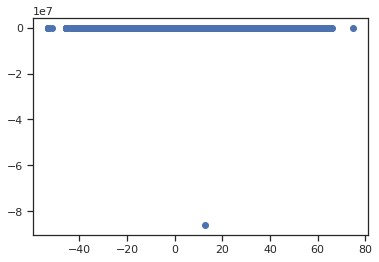

In [ ]:
plt.plot(ubicacion['latitude'], ubicacion['longitude'], 'o')

In [ ]:
ubication=ubicacion.drop(ubicacion[ubicacion.longitude==ubicacion.longitude.min()].index, axis=0)

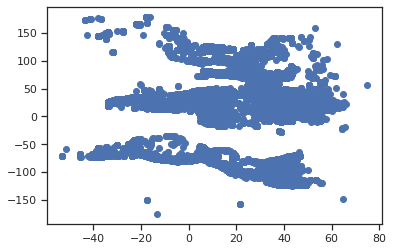

In [ ]:
plt.plot(ubication.latitude, ubication.longitude, 'o')

In [ ]:
k_means = KMeans(n_clusters=12, max_iter=10000)

In [ ]:
k_means.fit(ubication[['latitude', 'longitude']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centers = k_means.cluster_centers_

clasificaciones = k_means.predict(ubication[['latitude', 'longitude']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


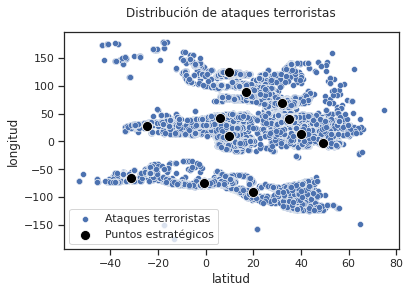

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Distribución de ataques terroristas', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(ubication.latitude, ubication.longitude, ax=ax, palette='rainbow', label='Ataques terroristas');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black', label='Puntos estratégicos');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


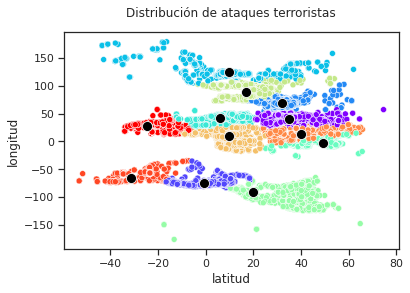

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Distribución de ataques terroristas', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(ubication.latitude, ubication.longitude, ax=ax, hue=clasificaciones, palette='rainbow', label='Ataques terroristas');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black', label='Puntos estratégicos');

ax.get_legend().remove()

In [ ]:
centers

array([[ 16.98803537,  89.85199655],
       [ 13.95832943, -83.34320889],
       [ 34.71027895,  40.08433877],
       [ 44.23268666,   2.5276842 ],
       [ 32.14888133,  69.37124834],
       [  1.52017361,  29.79132053],
       [-19.68387582, -71.89842953],
       [  9.59392755, 124.74288956]])

In [ ]:
df_pw_1.head()

,iyear,imonth,iday,latitude,longitude,nkill,nwound
0,1970,7,2,18.456792,-69.951164,1.0,0.0
1,1970,1,1,37.005105,-89.176269,0.0,0.0
2,1970,1,2,-34.891151,-56.187214,0.0,0.0
3,1970,1,2,37.791927,-122.225906,0.0,0.0
4,1970,1,2,43.076592,-89.412488,0.0,0.0


Para la regreción logística se consideran variables categóricas que fueron ignoradas en los primeros postworks. Éstas son: 

- crit1: Motivo político, religioso, económico o social. 
- crit2: Intensión de coarcionar, intimidar o llegar a una mayor audiencia. 
- crit3: Fuera del derecho internacional humanitario.

In [ ]:
crits=pd.read_csv('https://github.com/gilesitorr/DataScience3_Bloque4/blob/main/criterios.csv?raw=true')

In [ ]:
crits.drop(columns='Unnamed: 0')

,crit1,crit2,crit3,nkill,nwound
0,1,1,1,1.0,0.0
1,1,1,1,0.0,0.0
2,1,1,1,1.0,0.0
3,1,1,1,0.0,0.0
4,1,1,1,0.0,0.0
...,...,...,...,...,...
164812,1,1,0,1.0,2.0
164813,1,1,0,2.0,7.0
164814,1,1,1,0.0,0.0
164815,1,1,1,0.0,0.0


In [ ]:
X=crits[['nkill',	'nwound']]
c1=crits.crit1
c2=crits.crit2
c3=crits.crit3

In [ ]:
X_train, X_test, c1_train, c1_test = train_test_split(X, c1, test_size=0.3)
c2_train=c2[c1_train.index]
c3_train=c3[c1_train.index]
c2_test=c2[c1_test.index]
c3_test=c2[c1_test.index]

In [ ]:
LR=LogisticRegression()

In [ ]:
LR.fit(X_train, c1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
c1_pred = LR.predict(X_test)

c1_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
LR.score(X_test, c1_test)

0.9884722727824293

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[    0,   535],
       [    0, 48911]])

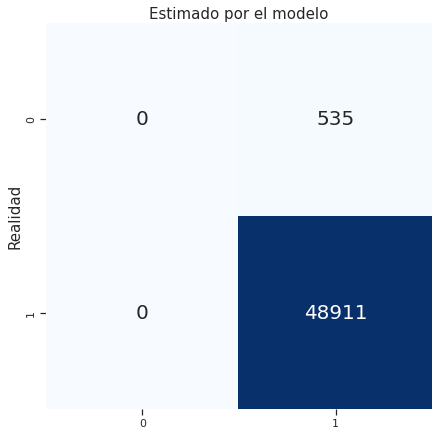

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);